In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
from itertools import zip_longest

import numpy as np
import matplotlib.pyplot as plt

from dogo.results import get_results
from dogo.plot_results import plot_experiment_metrics

In [32]:
plt.rc('font', size=12)

In [33]:
MP748 = get_results("MP748") # No REx
MP749 = get_results("MP749")
MP750 = get_results("MP750")
MP751 = get_results("MP751") # REx 0.1
MP752 = get_results("MP752")
MP753 = get_results("MP753")
MP754 = get_results("MP754") # REx 1.0
MP755 = get_results("MP755")
MP756 = get_results("MP756")
MP772 = get_results("MP772") # REx 5.0
MP773 = get_results("MP773")
MP774 = get_results("MP774")
MP757 = get_results("MP757") # REx 10.0
MP758 = get_results("MP758")
MP759 = get_results("MP759")
MP775 = get_results("MP775") # REx 10.0 - larger batches
MP776 = get_results("MP776")
MP777 = get_results("MP777")
MP778 = get_results("MP778") # REx 10.0 - larger batches - longer training
MP779 = get_results("MP779")
MP780 = get_results("MP780")

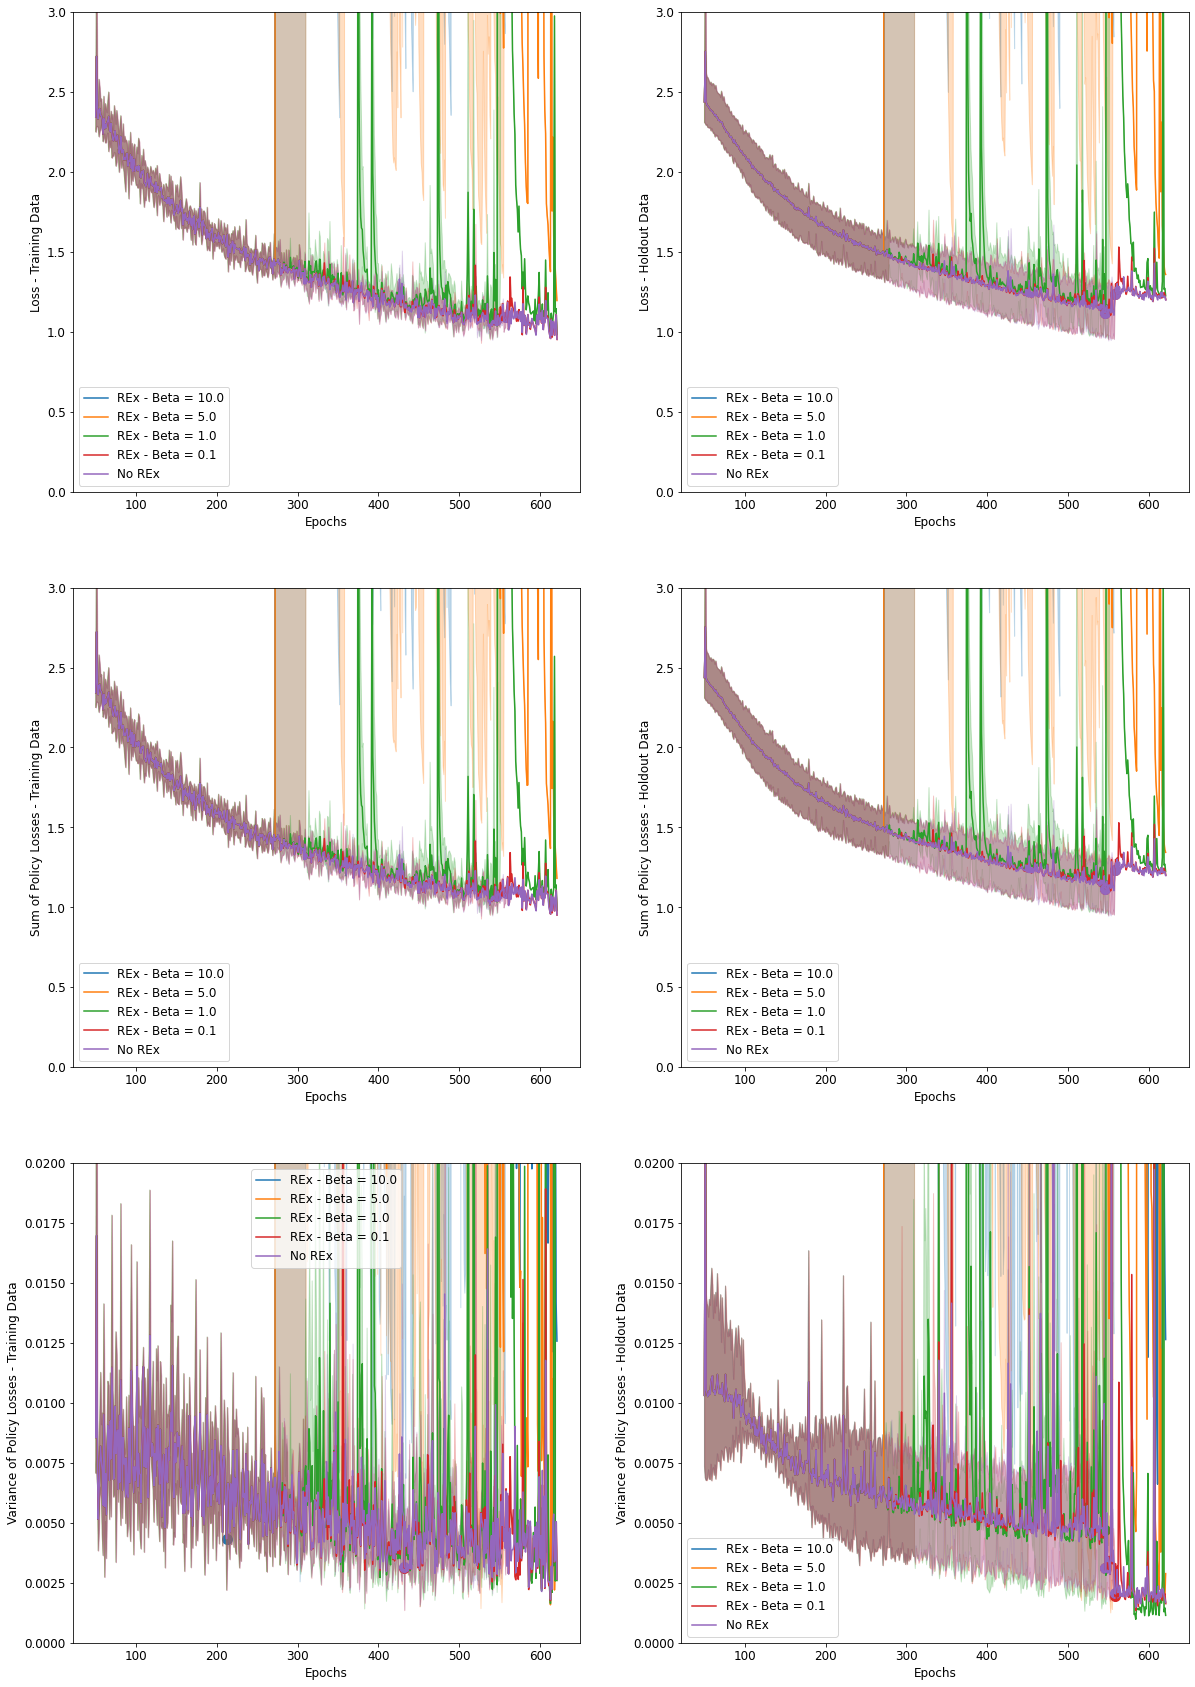

In [36]:
plot_experiment_metrics(
    [
        ('model_loss_history',                   'Loss - Training Data',                      (0,3.0)),
        ('model_holdout_loss_history',           'Loss - Holdout Data',                       (0,3.0)),
        ('model_pol_total_loss_history',         'Sum of Policy Losses - Training Data',      (0,3.0)),
        ('model_holdout_pol_total_loss_history', 'Sum of Policy Losses - Holdout Data',       (0,3.0)),
        ('model_pol_var_loss_history',           'Variance of Policy Losses - Training Data', (0,0.02)),
        ('model_holdout_pol_var_loss_history',   'Variance of Policy Losses - Holdout Data',  (0,0.02)),
    ],
    [[
        # ((MP778, MP779, MP780), 'REx - Beta = 10.0 - Larger Batch - Longer'),
        # ((MP775, MP776, MP777), 'REx - Beta = 10.0 - Larger Batch'),
        ((MP757, MP758, MP759), 'REx - Beta = 10.0'),
        ((MP772, MP773, MP774), 'REx - Beta = 5.0'),
        ((MP754, MP755, MP756), 'REx - Beta = 1.0'),
        ((MP751, MP752, MP753), 'REx - Beta = 0.1'),
        ((MP748, MP749, MP750), 'No REx'),
    ]],
    (3,2)
)

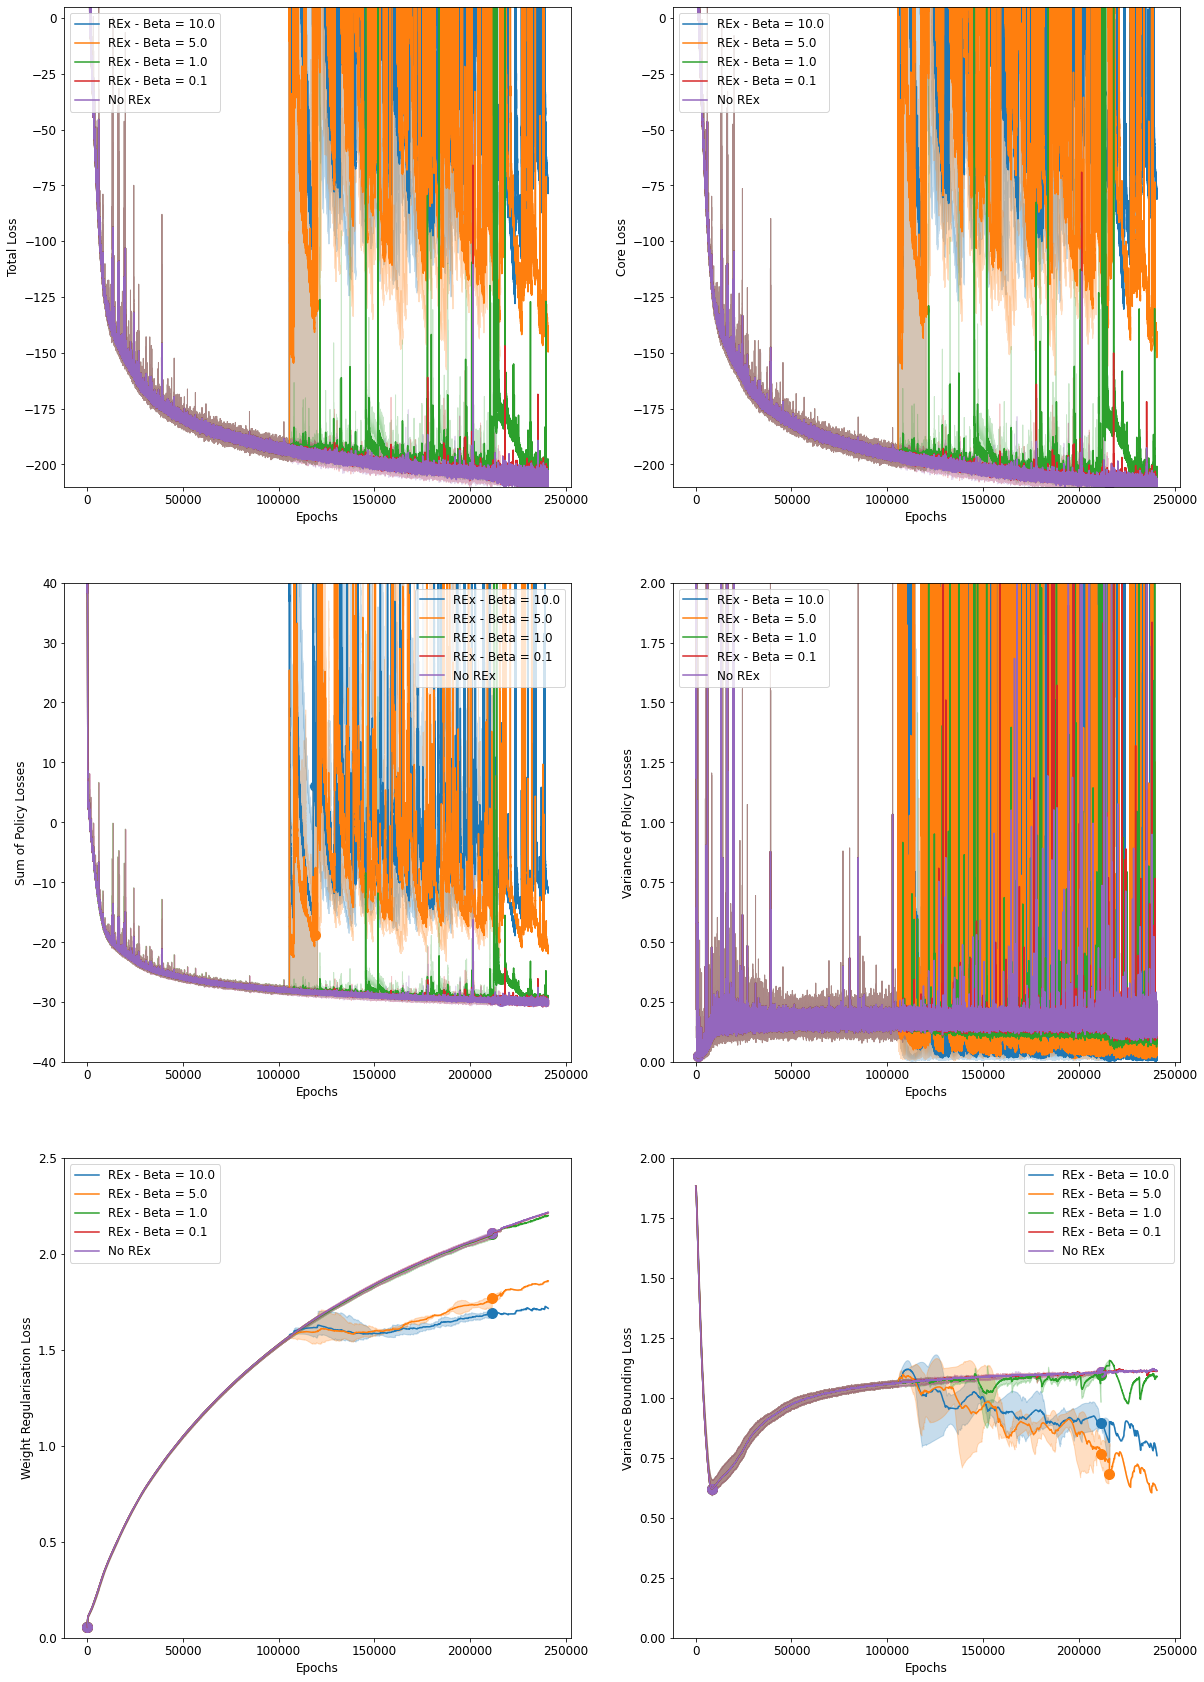

In [37]:
plot_experiment_metrics(
    [
        ('model_train_loss_history',           'Total Loss',                 (-210,5)),
        ('model_train_core_loss_history',      'Core Loss',                  (-210,5)),
        ('model_train_pol_total_loss_history', 'Sum of Policy Losses',       (-40,40)),
        ('model_train_pol_var_loss_history',   'Variance of Policy Losses',  (0,2)),
        ('model_train_decay_loss_history',     'Weight Regularisation Loss', (0,2.5)),
        ('model_train_var_lim_loss_history',   'Variance Bounding Loss',     (0,2)),
    ],
    [[
        # ((MP778, MP779, MP780), 'REx - Beta = 10.0 - Larger Batch - Longer'),
        # ((MP775, MP776, MP777), 'REx - Beta = 10.0 - Larger Batch'),
        ((MP757, MP758, MP759), 'REx - Beta = 10.0'),
        ((MP772, MP773, MP774), 'REx - Beta = 5.0'),
        ((MP754, MP755, MP756), 'REx - Beta = 1.0'),
        ((MP751, MP752, MP753), 'REx - Beta = 0.1'),
        ((MP748, MP749, MP750), 'No REx'),
    ]],
    (3,2)
)

In [7]:
np.mean(MP759.dynamics.model_train_pol_var_loss_history.values, axis=0)

array([4.54889117e+02, 3.16696001e+01, 1.34262039e+01, 1.28474793e+01,
       9.40116320e+02, 3.97431431e+01, 3.97780677e-01])

In [8]:
#######################################
# MOPO - Penalty 1.0 - Rollout Length 5
#######################################
MP781 = get_results("MP781") # No Rex
MP782 = get_results("MP782")
MP783 = get_results("MP783")
MP784 = get_results("MP784") # REx - 0.1
MP785 = get_results("MP785")
MP786 = get_results("MP786")
MP787 = get_results("MP787") # REx - 1.0
MP788 = get_results("MP788")
MP789 = get_results("MP789")
MP793 = get_results("MP793") # REx - 5.0
MP794 = get_results("MP794")
MP795 = get_results("MP795")
MP790 = get_results("MP790") # REx - 10.0
MP791 = get_results("MP791")
MP792 = get_results("MP792")

In [108]:
#######################################
# MOPO - Penalty 5.0 - Rollout Length 5
#######################################
MP796 = get_results("MP796") # No Rex
MP797 = get_results("MP797")
MP798 = get_results("MP798")
MP802 = get_results("MP802") # REx - 5.0
MP803 = get_results("MP803")
MP804 = get_results("MP804")
MP799 = get_results("MP799") # REx - 10.0
MP800 = get_results("MP800")
MP801 = get_results("MP801")

In [109]:
########################################
# MOPO - Penalty 5.0 - Rollout Length 10
########################################
MP817 = get_results("MP817") # No Rex
MP818 = get_results("MP818")
MP819 = get_results("MP819")
MP823 = get_results("MP823") # REx - 5.0
MP824 = get_results("MP824")
MP825 = get_results("MP825")
MP820 = get_results("MP820") # REx - 10.0
MP821 = get_results("MP821")
MP822 = get_results("MP822")

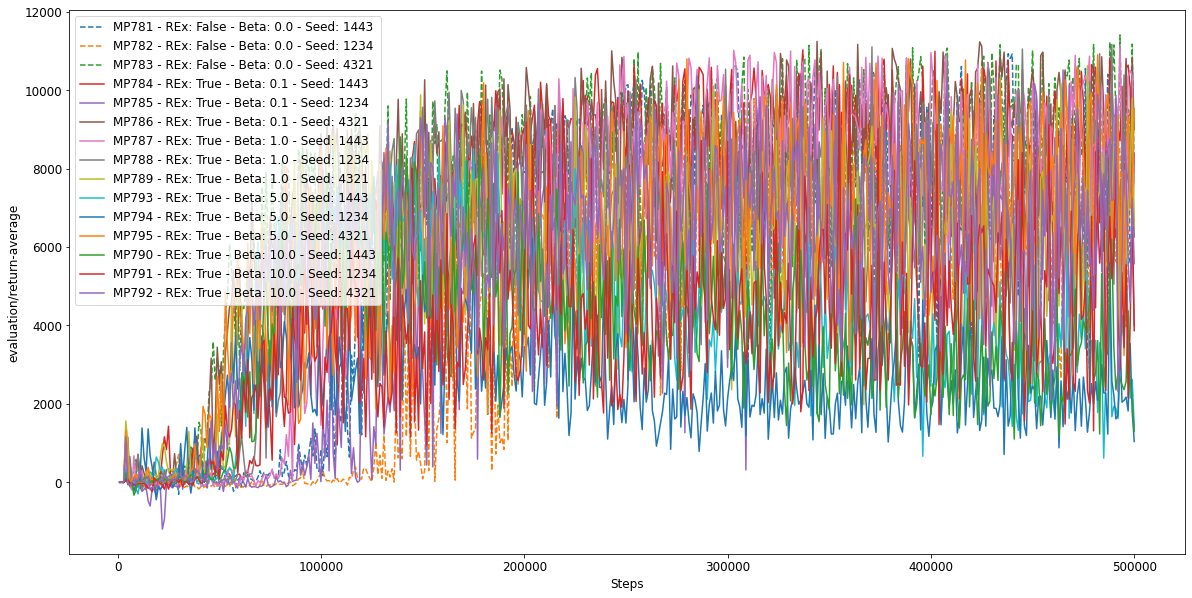

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP781, False, 0.0),
    (MP782, False, 0.0),
    (MP783, False, 0.0),
    (MP784, True, 0.1),
    (MP785, True, 0.1),
    (MP786, True, 0.1),
    (MP787, True, 1.0),
    (MP788, True, 1.0),
    (MP789, True, 1.0),
    (MP793, True, 5.0),
    (MP794, True, 5.0),
    (MP795, True, 5.0),
    (MP790, True, 10.0),
    (MP791, True, 10.0),
    (MP792, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

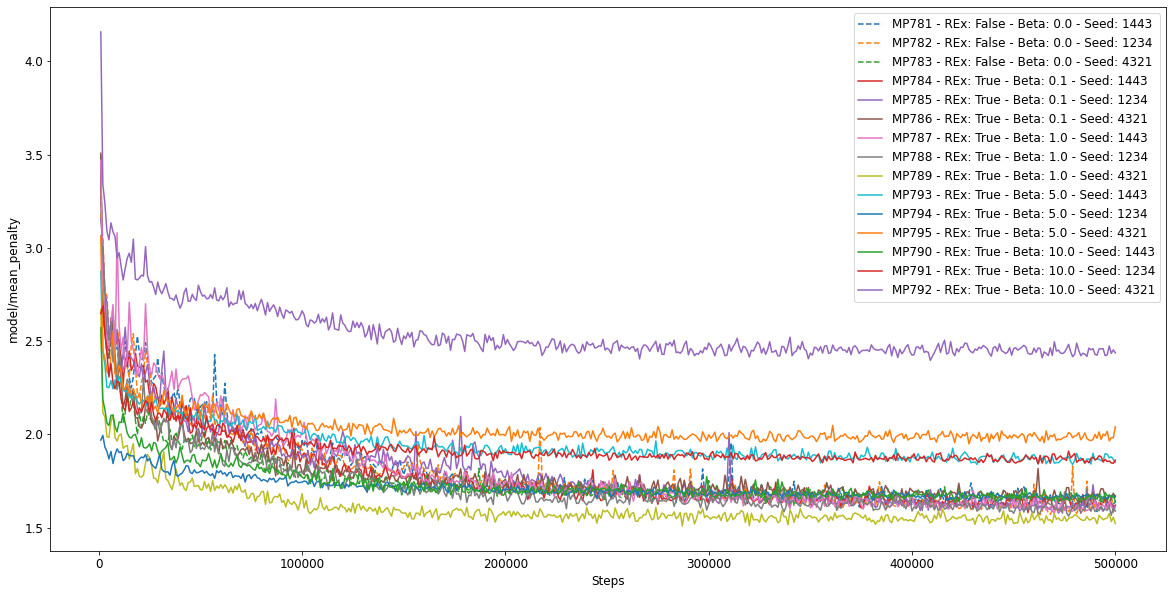

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'model/mean_penalty'
for exp, rex, beta in [
    (MP781, False, 0.0),
    (MP782, False, 0.0),
    (MP783, False, 0.0),
    (MP784, True, 0.1),
    (MP785, True, 0.1),
    (MP786, True, 0.1),
    (MP787, True, 1.0),
    (MP788, True, 1.0),
    (MP789, True, 1.0),
    (MP793, True, 5.0),
    (MP794, True, 5.0),
    (MP795, True, 5.0),
    (MP790, True, 10.0),
    (MP791, True, 10.0),
    (MP792, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

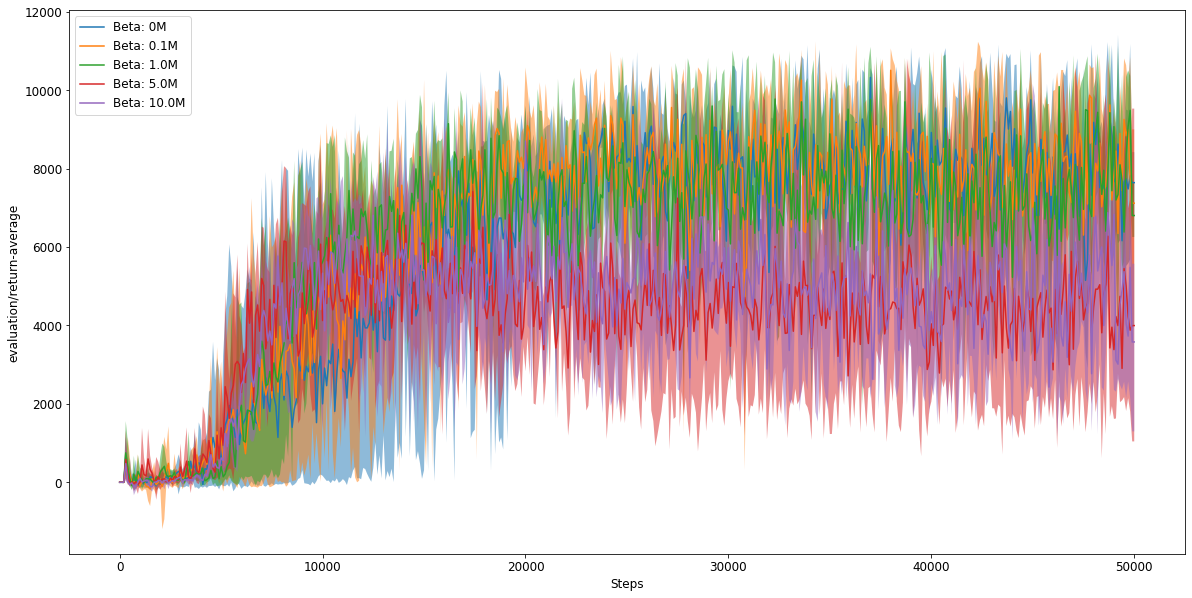

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set, steps in [
    ((MP781, MP782, MP783), '0'),
    ((MP784, MP785, MP786), '0.1'),
    ((MP787, MP788, MP789), '1.0'),
    ((MP793, MP794, MP795), '5.0'),
    ((MP790, MP791, MP792), '10.0'),
]:
    comb_arr = np.vstack(list(zip_longest(*[
        exp.sac.result[feature] for exp in exp_set
        ],
        fillvalue=np.NaN
    )))
    mean_arr = np.nanmean(comb_arr, axis=-1)
    min_arr = np.nanmin(comb_arr, axis=-1)
    max_arr = np.nanmax(comb_arr, axis=-1)
    x_vals = np.arange(len(mean_arr))*100
    ax.plot(x_vals, mean_arr, label=f'Beta: {steps}M')
    ax.fill_between(x_vals, min_arr, max_arr, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
# ax.set_xlim(-1000,501000)
# ax.set_ylim(-3000,12500)
ax.legend(loc='upper left')
pass

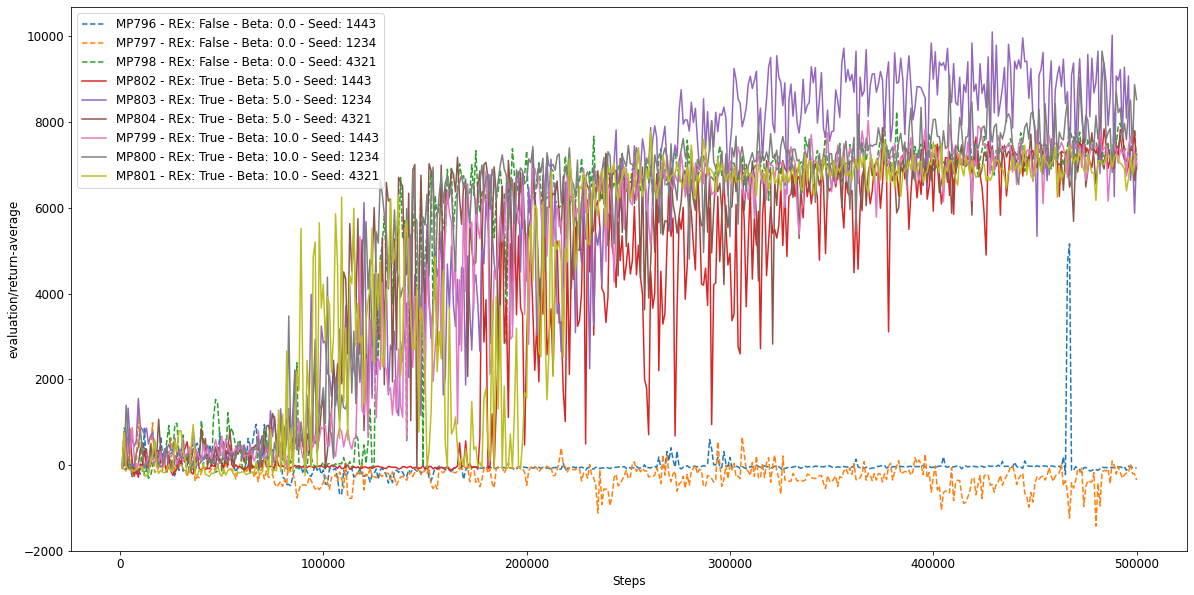

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP796, False, 0.0),
    (MP797, False, 0.0),
    (MP798, False, 0.0),
    (MP802, True, 5.0),
    (MP803, True, 5.0),
    (MP804, True, 5.0),
    (MP799, True, 10.0),
    (MP800, True, 10.0),
    (MP801, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

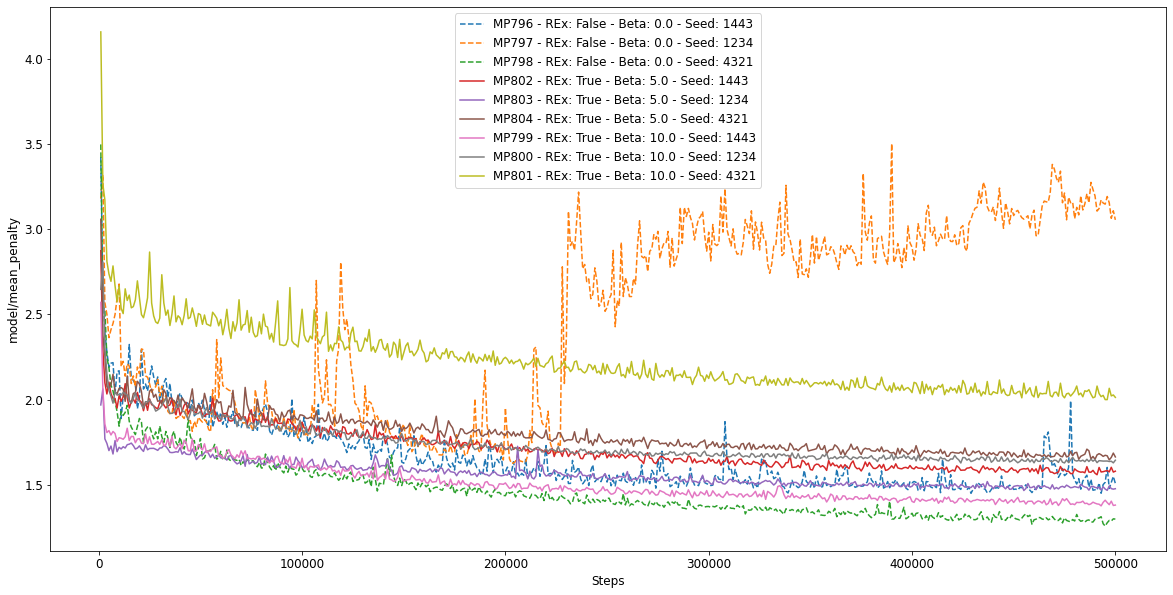

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'model/mean_penalty'
for exp, rex, beta in [
    (MP796, False, 0.0),
    (MP797, False, 0.0),
    (MP798, False, 0.0),
    (MP802, True, 5.0),
    (MP803, True, 5.0),
    (MP804, True, 5.0),
    (MP799, True, 10.0),
    (MP800, True, 10.0),
    (MP801, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

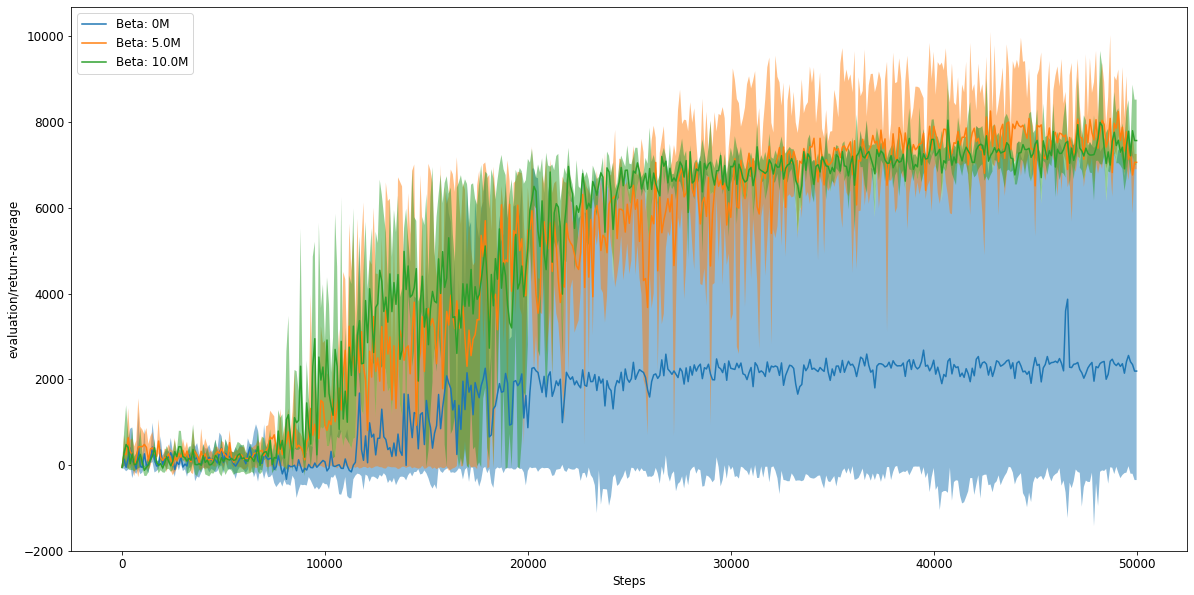

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set, steps in [
    ((MP796, MP797, MP799), '0'),
    ((MP802, MP803, MP804), '5.0'),
    ((MP799, MP800, MP801), '10.0'),
]:
    comb_arr = np.vstack(list(zip_longest(*[
        exp.sac.result[feature] for exp in exp_set
        ],
        fillvalue=np.NaN
    )))
    mean_arr = np.nanmean(comb_arr, axis=-1)
    min_arr = np.nanmin(comb_arr, axis=-1)
    max_arr = np.nanmax(comb_arr, axis=-1)
    x_vals = np.arange(len(mean_arr))*100
    ax.plot(x_vals, mean_arr, label=f'Beta: {steps}M')
    ax.fill_between(x_vals, min_arr, max_arr, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
# ax.set_xlim(-1000,501000)
# ax.set_ylim(-3000,12500)
ax.legend(loc='upper left')
pass

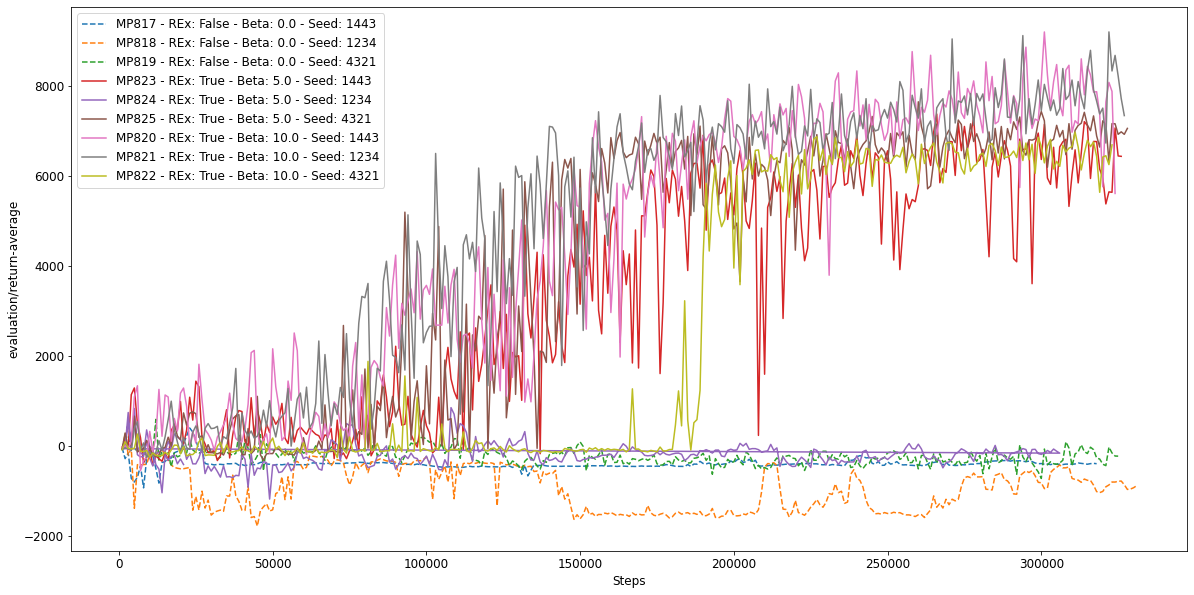

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP817, False, 0.0),
    (MP818, False, 0.0),
    (MP819, False, 0.0),
    (MP823, True, 5.0),
    (MP824, True, 5.0),
    (MP825, True, 5.0),
    (MP820, True, 10.0),
    (MP821, True, 10.0),
    (MP822, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

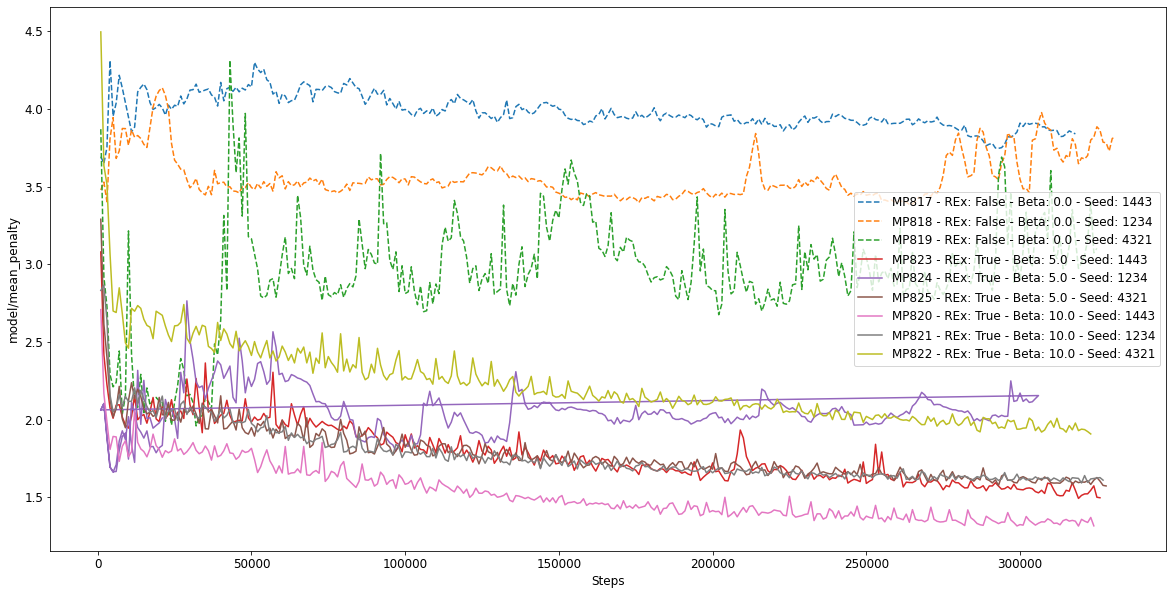

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'model/mean_penalty'
for exp, rex, beta in [
    (MP817, False, 0.0),
    (MP818, False, 0.0),
    (MP819, False, 0.0),
    (MP823, True, 5.0),
    (MP824, True, 5.0),
    (MP825, True, 5.0),
    (MP820, True, 10.0),
    (MP821, True, 10.0),
    (MP822, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

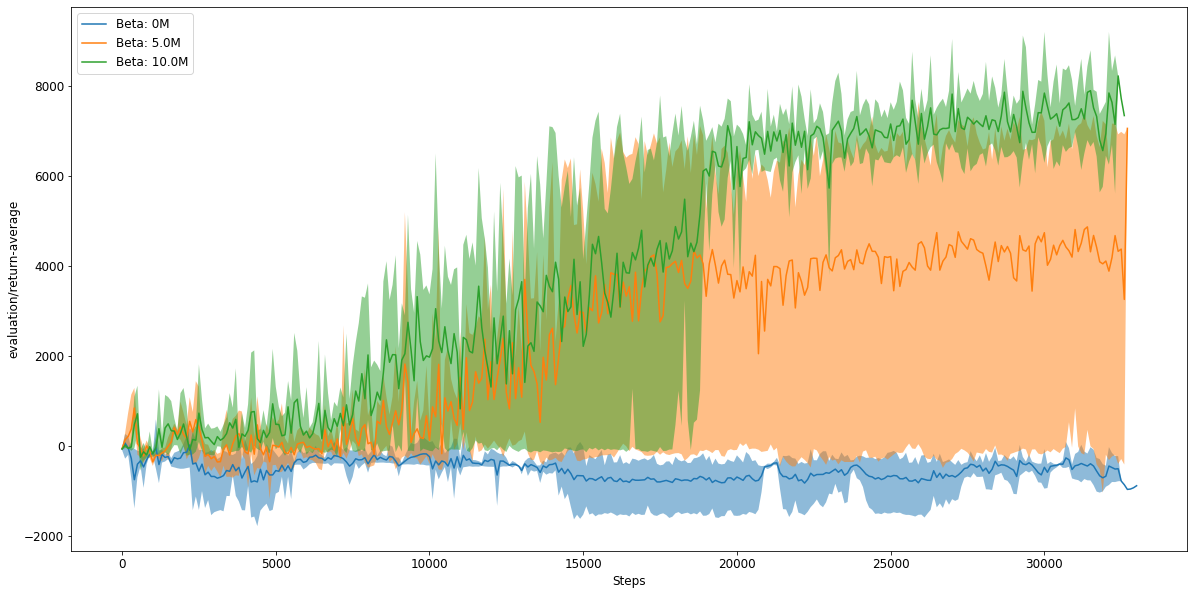

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set, steps in [
    ((MP817, MP818, MP819), '0'),
    ((MP823, MP824, MP825), '5.0'),
    ((MP820, MP821, MP822), '10.0'),
]:
    comb_arr = np.vstack(list(zip_longest(*[
        exp.sac.result[feature] for exp in exp_set
        ],
        fillvalue=np.NaN
    )))
    mean_arr = np.nanmean(comb_arr, axis=-1)
    min_arr = np.nanmin(comb_arr, axis=-1)
    max_arr = np.nanmax(comb_arr, axis=-1)
    x_vals = np.arange(len(mean_arr))*100
    ax.plot(x_vals, mean_arr, label=f'Beta: {steps}M')
    ax.fill_between(x_vals, min_arr, max_arr, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
# ax.set_xlim(-1000,501000)
# ax.set_ylim(-3000,12500)
ax.legend(loc='upper left')
pass